<a href="https://colab.research.google.com/github/PingPingE/Learn_ML_DL/blob/main/Decision_Tree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

- 데이터들이 가진 속성들로부터 분할 기준 속성을 판별하고, 분할 기준 속성에 따라 트리 형태로 모델링하는 분류,회귀,다중출력 모델
- 분할 기준 설정: 부모노드(현재 노드)에 비해 자식 노드의 불순도가 감소되도록 설정한다.
- 현재 노드의 불순도와 자식 노드의 불순도 차이가 최대가 되는 기준을 찾는다.
<br>

### 장점
- 과정 이해 및 해석하기 쉽다.
- 전처리 부담을 줄여준다.(스케일링 등의 작업이 무의미)
- 대용량 데이터에서도 빠르게 만들 수 있다.
- 수치형과 범주형 모두 다룰 수 있다.
<br>

### 단점
- 연속형 변수를 비연속적인 값으로 취급하므로 분리의 경계점 근방에서 예측 오류가 클 가능성이 있다.
- 선형 관계를 다루지 못한다. 
- input 데이터에만 의존해서 과적합의 위험성이 높다.(너무 데이터가 적거나 피처가 너무 많거나, 데이터가 불균형하거나 등의 경우 X) -> 앙상블, 차원 축소 등으로 완화하자.
- 속성들 끼리 복잡한 관계가 있는 경우, 똑같은 subtree들이 만들어 질 수 있다.

<br>

### 의사결정나무의 분석 과정
1. <strong>의사결정 나무 성장(Growing)</strong>: 분석의 목적과 자료구조에 따라 적절한 분리 규칙(Splitting Rule)을 찾아서 나무를 성장 시킨다(Stopping Rule을 만족하면 중단)
  - 재귀적으로 수행(분리하고 거기서 또 분리하고...)
  - 분리 기준: 입력 변수의 선택 + 범주 선정


2. <strong>가지치기(Pruning)</strong>: 최대트리로 형성된 결정트리에서 일부 서브트리만 남겨서 일반화 성능을 높인다.

3. <strong>타당성 평가</strong>: 이익 도표(Gain chart), 위험 도표(Risk chart)를 이용해서 Cross validation 등을 이용한 평가 수행

4. <strong>해석 및 예측</strong>: 구축된 의사결정나무 모형을 해석하고, 분류 및 예측 모형을 설정하여 데이터의 분류 및 예측에 활용한다.

<br><br>

### 대표적인 Decision Tree 알고리즘 종류
#### ID3
- split 기준: Information Gain
- 속성값이 범주형일 때만 가능
- pruning이 없다.

#### C4.5
- ID3의 업그레이드 버전(속성값이 숫자형일 때도 가능)
- split 기준: Gain Ratio
- pruning: Error-based pruning

#### CART
- regression tree를 만들 수 있다는 것이 아주 중요한 특징
- split 기준: Twoing Criterion, squared error(regression tree인 경우)
- pruning: Cost-complexity pruning

#### 기타
- CHAID
- QUEST
- CAL5

참고)
- [researchgate](https://www.researchgate.net/publication/225237661_Decision_Trees)
- [scikit-learn](https://scikit-learn.org/stable/modules/tree.html)
- [scikit-learn github](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/tree/_tree.pyx)
- [youtube-StatQuest](https://www.youtube.com/watch?v=7VeUPuFGJHk)
- 수제비
- 핸즈온 머신러닝

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston

## Classification

In [ ]:
X,y=load_iris(return_X_y=True)
clf=tree.DecisionTreeClassifier(random_state=1)
clf=clf.fit(X,y)

In [ ]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
X.shape

(150, 4)

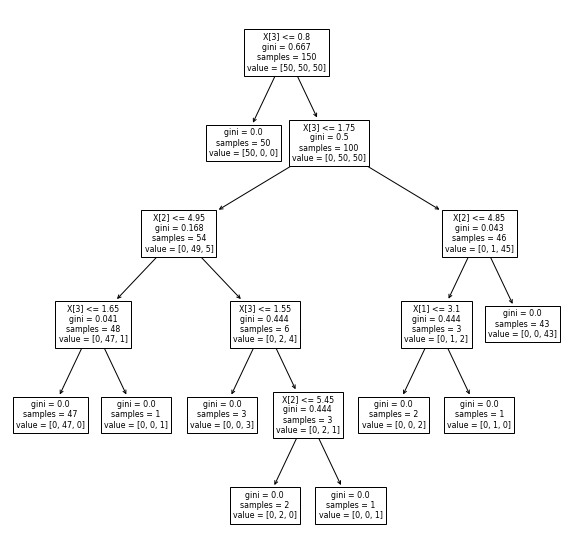

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()

## Regression

In [ ]:
X_2,y_2=load_boston(return_X_y=True)
reg=tree.DecisionTreeRegressor(max_depth=3) #깊어서 보기 힘듦...
reg=reg.fit(X_2,y_2)

In [ ]:
reg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
X_2.shape

(506, 13)

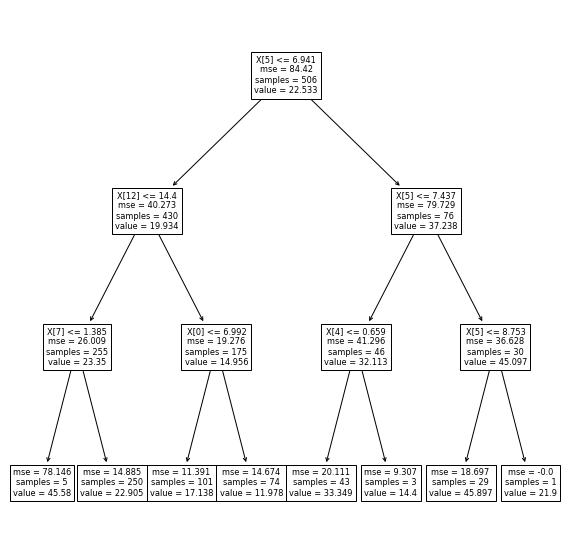

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(reg)
plt.show()

## 실험실


### y=2x

In [ ]:
X,y=np.array([1,3,4,5,10,20,30]), np.array([2,6,8,10,20,40,60])

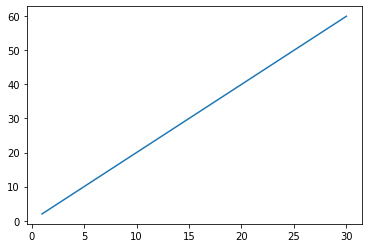

In [ ]:
plt.plot(X,y)

#### Decision Tree

In [ ]:
dt=tree.DecisionTreeRegressor()

In [ ]:
dt.fit(X.reshape((-1,1)),y.reshape((-1,1)))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

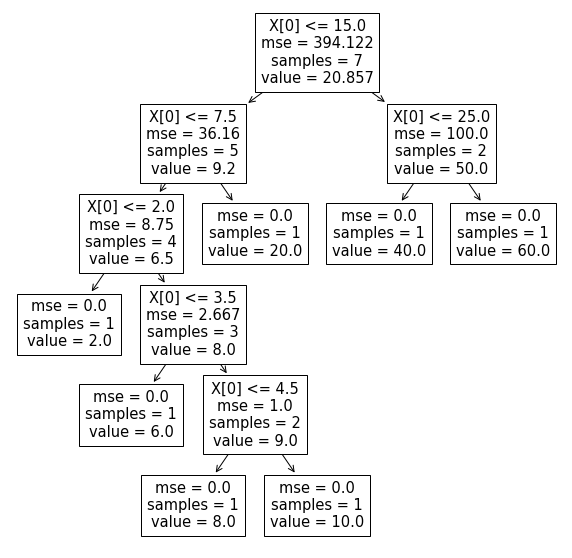

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt)
plt.show()

In [ ]:
X_test=np.array([2,4,6,100])
dt.predict(X_test.reshape(-1,1))

array([ 2.,  8., 10., 60.])

--------------
- 학습 데이터의 범위 내에서만 결과를 도출한다.

#### Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rid=Ridge()

In [ ]:
rid.fit(X.reshape(-1,1), y.reshape(-1,1))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
#weight 값
rid.coef_

array([[1.99710445]])

In [ ]:
rid.predict(X_test.reshape(-1,1))

array([[  4.02440538],
       [  8.01861427],
       [ 12.01282316],
       [199.74064116]])

---------------------
- y=1.997x로 y=2x와 근사하다.

#### Built-in vs Permutation 

In [2]:
from sklearn.inspection import permutation_importance

In [3]:
boston = load_boston()
X=pd.DataFrame(boston.data, columns=boston.feature_names)
y=boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=12)

- feature nunique 확인

In [4]:
boston_df= pd.DataFrame(boston.data, columns=boston.feature_names)
pd.DataFrame(boston_df.nunique().sort_values()).T

,CHAS,RAD,ZN,PTRATIO,TAX,INDUS,NOX,AGE,B,DIS,RM,LSTAT,CRIM
0,2,9,26,46,66,76,81,356,357,412,446,455,504


In [120]:
def fig_feature_importance(**params):
  dt_reg=tree.DecisionTreeRegressor(**params)
  dt_reg.fit(X_train,y_train)
  perm_importance = permutation_importance(dt_reg, X_test,y_test,n_repeats=10,random_state=0) #test 셋으로 중요성 판단, random_state설정
  perm_mean= np.mean(abs(perm_importance.importances),axis=1) #주의! 전부 절댓값 먼저 씌우고 평균 구할 것(크기만 따질 것이므로 절댓값으로 본다)
  # print(np.mean(abs(perm_importance.importances)[0]),np.mean(abs(perm_importance.importances)[1]))
  # print(perm_mean)
  mean_sum = sum(perm_mean)
  normalized_perm_importance=perm_mean/mean_sum #permutation도 정규화하기
  sorted_idx_p = normalized_perm_importance.argsort()

  plt.figure(figsize=(25,5))
  plt.suptitle(f"score: {dt_reg.score(X_test, y_test)}")
  plt.subplot(1,3,1)
  plt.title("built-in")
  sorted_idx_b = dt_reg.feature_importances_.argsort()
  plt.barh(boston.feature_names[sorted_idx_b],dt_reg.feature_importances_[sorted_idx_b])
  plt.grid()
  

  plt.subplot(1,3,2)
  plt.title("permutation")
  plt.barh(boston.feature_names[sorted_idx_p],normalized_perm_importance[sorted_idx_p] ) 
  # plt.barh(boston.feature_names,normalized_perm_importance )
  plt.grid()

  plt.subplot(1,3,3)
  plt.title("comparison")
  plt.barh(boston.feature_names[sorted_idx_p], normalized_perm_importance[sorted_idx_p],label='permutation')
  plt.barh(boston.feature_names[sorted_idx_b],dt_reg.feature_importances_[sorted_idx_b])
  plt.grid()
  plt.legend()

- max_depth에 따른 각각의 importance 비교

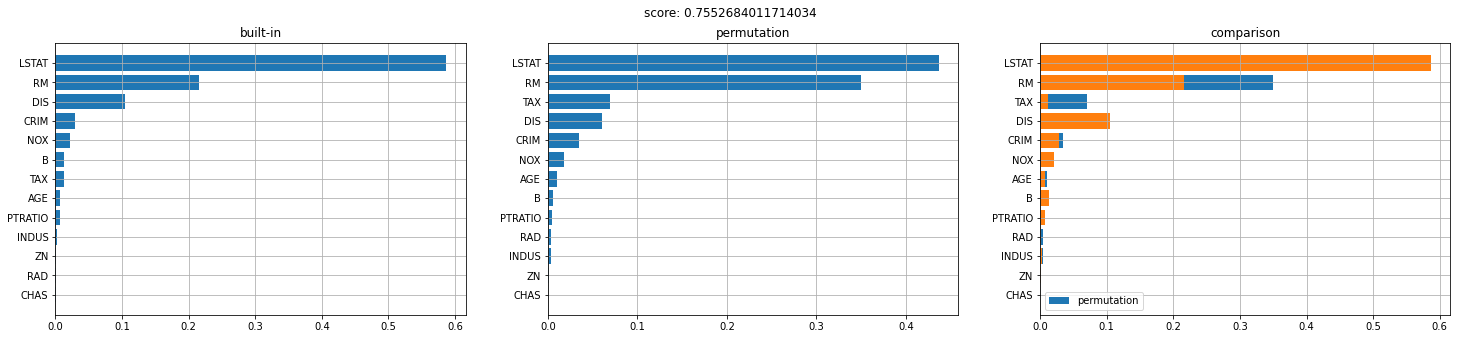

In [122]:
fig_feature_importance(max_depth=10,random_state=0)

In [ ]:
pd.DataFrame(boston_df.nunique().sort_values()).T

,CHAS,RAD,ZN,PTRATIO,TAX,INDUS,NOX,AGE,B,DIS,RM,LSTAT,CRIM
0,2,9,26,46,66,76,81,356,357,412,446,455,504


------------------
- permutation을 보면 LSTAT과 RM의 차이가 크게 나지 않는데, built-in을 보면, LSTAT이 RM보다 약 3배 더 중요한 것으로 나온다.
- TAX 중요도가 built-in과 permutation에서 크게 차이난다. 
- CRIM과 DIS의 차이는

=> TAX의 cardinality가 상위에 있는 feature들보다 많이 낮아서 중요한 feature임에도 반영이 덜 된 것일까?<br>
(그런데 CRIM과 DIS의 차이는 built-in이 더 심하다(CRIM이 훨 낮음))


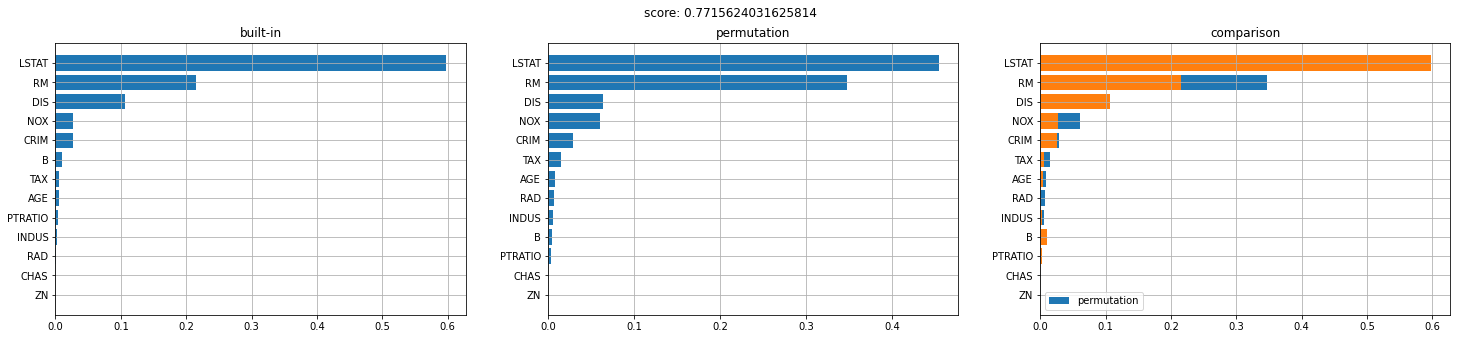

In [123]:
fig_feature_importance(max_depth=7,random_state=0)

In [90]:
pd.DataFrame(boston_df.nunique().sort_values()).T

,CHAS,RAD,ZN,PTRATIO,TAX,INDUS,NOX,AGE,B,DIS,RM,LSTAT,CRIM
0,2,9,26,46,66,76,81,356,357,412,446,455,504


---------------
- max_depth 값을 낮춰서 과적합 현상을 조금 완화했다. 
- 눈에 띄는 변화는, permutation에서는 DIS와 NOX가 비슷한 중요도를 가진다는 것이다. 
- CRIM과 NOX는 built-in에서는 둘의 차이가 크지 않지만(NOX가 CRIM을 역전하긴 했다), permutation은 NOX가 CRIM보다 약 두 배 더 중요한 것으로 나온다.

=> built-in에서는 cardinality의 차이가 클수록, cardinality가 낮은 feature의 중요도가 더 높아지기 힘들어보인다. 

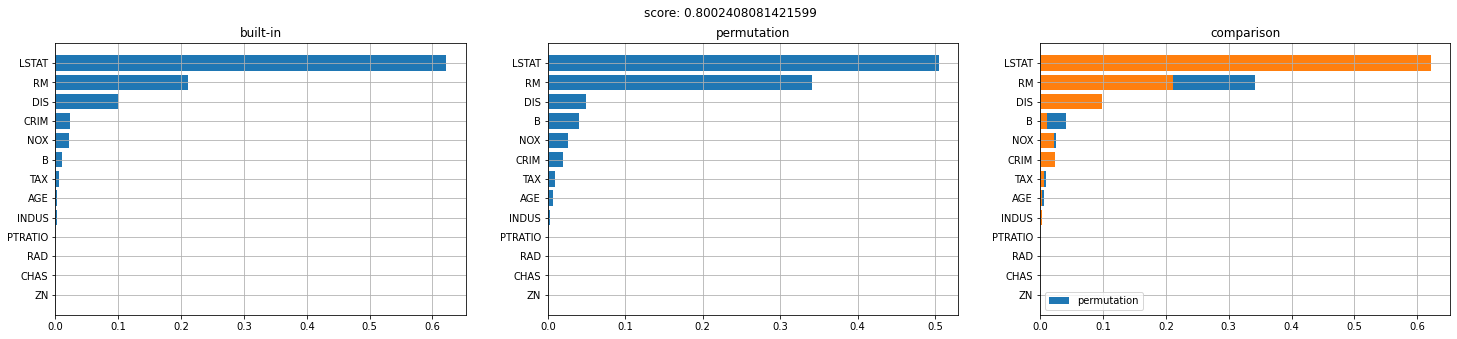

In [124]:
fig_feature_importance(max_depth=5,random_state=0)

In [91]:
pd.DataFrame(boston_df.nunique().sort_values()).T

,CHAS,RAD,ZN,PTRATIO,TAX,INDUS,NOX,AGE,B,DIS,RM,LSTAT,CRIM
0,2,9,26,46,66,76,81,356,357,412,446,455,504


----------------------------

- max_depth를 더 낮춰서 더 좋은 모델을 만들어봤다.
- permutation에서는 B의 중요도가 많이 높아졌다.
- built-in에서는 또 다시 CRIM이 NOX보다 좀 더 높아졌다.
- permutation에서도 CRIM과 NOX의 차이가 이전보다 많이 좁혀졌다. 

------------------
permutation방식과 built-in방식 모두 너무 다른 결과를 보여준다.
따라서 여러 방법으로 feature importance를 구해봐야 할 것 같다.



## 의사결정나무의 구성요소

In [ ]:
cdef struct Node:
    # Base storage structure for the nodes in a Tree object

    SIZE_t left_child                    # id of the left child of the node
    SIZE_t right_child                   # id of the right child of the node
    SIZE_t feature                       # Feature used for splitting the node
    DOUBLE_t threshold                   # Threshold value at the node
    DOUBLE_t impurity                    # Impurity of the node (i.e., the value of the criterion)
    SIZE_t n_node_samples                # Number of samples at the node
    DOUBLE_t weighted_n_node_samples     # Weighted number of samples at the node

## 성장(Growing) 과정
#### CART(Classification And Regression Tree)알고리즘
  - Top-down 방식
  - 특성 k의 임곗값 t_k를 사용해서 두 개의 서브셋으로 나눈다.
  - 가장 순수한(impurity가 최소인) 서브셋으로 나눌 수 있는 (k,t_k)를 찾는 것이 목표
  - impurity를 줄이는 분할을 찾을 수 없을 때나 min_samples_split, max_depth 등의 중지 조건에 의해 중단된다. (Pre-Pruning or Early Stopping)

### DepthFirstTreeBuilder

In [ ]:
cdef Stack stack = Stack(INITIAL_STACK_SIZE)
        cdef StackRecord stack_record

        with nogil:
            # push root node onto stack
            rc = stack.push(0, n_node_samples, 0, _TREE_UNDEFINED, 0, INFINITY, 0)
            if rc == -1:
                # got return code -1 - out-of-memory
                with gil:
                    raise MemoryError()

            while not stack.is_empty():
                            stack.pop(&stack_record)

                            start = stack_record.start
                            end = stack_record.end
                            depth = stack_record.depth
                            parent = stack_record.parent
                            is_left = stack_record.is_left
                            impurity = stack_record.impurity
                            n_constant_features = stack_record.n_constant_features

                            n_node_samples = end - start
                            splitter.node_reset(start, end, &weighted_n_node_samples)

                            #=======Stopping rule 체크
                            is_leaf = (depth >= max_depth or
                                      n_node_samples < min_samples_split or
                                      n_node_samples < 2 * min_samples_leaf or
                                      weighted_n_node_samples < 2 * min_weight_leaf)

                            if first:
                                impurity = splitter.node_impurity()
                                first = 0

                            #=======Stopping rule에 걸렸거나 impurity가 최소 기준보다 낮으면 성장 중지 => Early Stopping(Pre-Pruning)
                            is_leaf = (is_leaf or
                                      (impurity <= min_impurity_split))

                            if not is_leaf: #=======아무 해당 없으면 split 조건 확인
                                splitter.node_split(impurity, &split, &n_constant_features)
                                # If EPSILON=0 in the below comparison, float precision
                                # issues stop splitting, producing trees that are
                                # dissimilar to v0.18
                                is_leaf = (is_leaf or split.pos >= end or
                                          (split.improvement + EPSILON <
                                            min_impurity_decrease))#=======Splitting rule 체크

                            node_id = tree._add_node(parent, is_left, is_leaf, split.feature,
                                                    split.threshold, impurity, n_node_samples,
                                                    weighted_n_node_samples)

                            if node_id == SIZE_MAX: #=======끝?
                                rc = -1
                                break


                            # Store value for all nodes, to facilitate tree/model
                            # inspection and interpretation
                            splitter.node_value(tree.value + node_id * tree.value_stride)

                            if not is_leaf: #======stopping 조건을 만족하지 못하면 split 수행 + stack에 넣기
                                # Push right child on stack
                                rc = stack.push(split.pos, end, depth + 1, node_id, 0,
                                                split.impurity_right, n_constant_features)
                                if rc == -1:
                                    break

                                # Push left child on stack
                                rc = stack.push(start, split.pos, depth + 1, node_id, 1,
                                                split.impurity_left, n_constant_features)
                                if rc == -1:
                                    break

                            if depth > max_depth_seen:
                                max_depth_seen = depth

                        if rc >= 0:
                            rc = tree._resize_c(tree.node_count)

                        if rc >= 0:
                            tree.max_depth = max_depth_seen
                    if rc == -1:
                        raise MemoryError()

### BestFirstTreeBuilder

In [ ]:
 cdef class BestFirstTreeBuilder(TreeBuilder):
    """Build a decision tree in best-first fashion.
    The best node to expand is given by the node at the frontier that has the
    highest impurity improvement.
    """
    cdef SIZE_t max_leaf_nodes

#..... 중간 생략
 # Initial capacity
        cdef SIZE_t init_capacity = max_split_nodes + max_leaf_nodes
        tree._resize(init_capacity)

        with nogil:
            # add root to frontier
            rc = self._add_split_node(splitter, tree, 0, n_node_samples,
                                      INFINITY, IS_FIRST, IS_LEFT, NULL, 0,
                                      &split_node_left)
            if rc >= 0:
                rc = _add_to_frontier(&split_node_left, frontier)

            if rc == -1:
                with gil:
                    raise MemoryError()

            while not frontier.is_empty():
                frontier.pop(&record)

                node = &tree.nodes[record.node_id]
                is_leaf = (record.is_leaf or max_split_nodes <= 0)

                if is_leaf:
                    # Node is not expandable; set node as leaf
                    node.left_child = _TREE_LEAF
                    node.right_child = _TREE_LEAF
                    node.feature = _TREE_UNDEFINED
                    node.threshold = _TREE_UNDEFINED

                else:
                    # Node is expandable

                    # Decrement number of split nodes available
                    max_split_nodes -= 1

                    # Compute left split node
                    rc = self._add_split_node(splitter, tree,
                                              record.start, record.pos,
                                              record.impurity_left,
                                              IS_NOT_FIRST, IS_LEFT, node,
                                              record.depth + 1,
                                              &split_node_left)
                    if rc == -1:
                        break

                    # tree.nodes may have changed
                    node = &tree.nodes[record.node_id]

                    # Compute right split node
                    rc = self._add_split_node(splitter, tree, record.pos,
                                              record.end,
                                              record.impurity_right,
                                              IS_NOT_FIRST, IS_NOT_LEFT, node,
                                              record.depth + 1,
                                              &split_node_right)
                    if rc == -1:
                        break

                    # Add nodes to queue
                    rc = _add_to_frontier(&split_node_left, frontier)
                    if rc == -1:
                        break

                    rc = _add_to_frontier(&split_node_right, frontier)
                    if rc == -1:
                        break

                if record.depth > max_depth_seen:
                    max_depth_seen = record.depth

            if rc >= 0:
                rc = tree._resize_c(tree.node_count)

            if rc >= 0:
                tree.max_depth = max_depth_seen

        if rc == -1:
            raise MemoryError()

### Depth-first, Best-first 언제 쓸까?

In [ ]:
#sklearn/tree/_classes.py  line: 372~
# Use BestFirst if max_leaf_nodes given; use DepthFirst otherwise
        if max_leaf_nodes < 0: #===============max_leaf_nodes가 default(None)일 때 -> Depth-first
            builder = DepthFirstTreeBuilder(splitter, min_samples_split,
                                            min_samples_leaf,
                                            min_weight_leaf,
                                            max_depth,
                                            self.min_impurity_decrease,
                                            min_impurity_split)
        else:
            builder = BestFirstTreeBuilder(splitter, min_samples_split,
                                           min_samples_leaf,
                                           min_weight_leaf,
                                           max_depth,
                                           max_leaf_nodes,
                                           self.min_impurity_decrease,
                                           min_impurity_split)

- BestFirstTreeBuilder의 tree 크기 초기화 코드

In [ ]:
  cdef SIZE_t max_split_nodes = max_leaf_nodes - 1 #max_split_nodes의 초깃값
  # Initial capacity
  cdef SIZE_t init_capacity = max_split_nodes + max_leaf_nodes 
        tree._resize(init_capacity)

- DepthFirstTreeBuilder의 tree 크기 초기화 코드

In [ ]:
# Initial capacity
        cdef int init_capacity

        if tree.max_depth <= 10:
            init_capacity = (2 ** (tree.max_depth + 1)) - 1
        else:
            init_capacity = 2047

        tree._resize(init_capacity)

<img src="https://i.stack.imgur.com/e1FWe.png" width="50%" height="50%"/>
<img src="https://i.stack.imgur.com/YOE9y.png" width="50%" height="50%"/>

-------------------------------
참고: [StackExchange](https://datascience.stackexchange.com/questions/26699/decision-trees-leaf-wise-best-first-and-level-wise-tree-traverse)



- DepthFirstTreeBuilder는 level-wise, BestFirstTreeBuilder는 leaf-wise 방식
- leaf-wise는 global 하게 impurity를 체크하고, 낮아지는 쪽으로 split -> 그래서 대부분 level-wise보다 빠르다.
- global하게 보기 때문에 node가 많고, stopping이나 pruning을 하지 않는다면, leaf-wise는 매번 똑같은 트리를 생성한다.

## 가지치기(Pruning) 과정
#### Tree Complexity에 관여하는 요소들
- 전체 노드  수
- 전체 리프 노드 수
- 트리 깊이
- 사용 feature 수

#### Cost Complexity Pruning
- cost-complexity function값이 작은 subtree를 선택하는 방법
- 큰 트리를 만든 후, subtree로 가지치기를 한다.
- 리프 노드 개수를 고려하는 방법
> 그냥 cost값(R(T))만 고려해선 overfitting의 해결책이 될 수 없다. 그래서 Tree Complexity Penalty(a|T|)를 cost에 더해서 고려한다. <br><br>
> Cα(T)=R(T)+α|T| <br>
> a는 하이퍼파라미터(얼마나 penalty를 줄 것 인지), T는 리프 노드 개수(subtree의 크기가 클수록 노드 개수가 많으니까)


참고: [youtube-StatQuest](https://www.youtube.com/watch?v=D0efHEJsfHo), [StackExchange](https://stats.stackexchange.com/questions/193538/how-to-choose-alpha-in-cost-complexity-pruning)

As formula: Minimize
Cα(T−Tt)−Cα(T)=R(T−Tt)+α|T−Tt|−(R(T)+α|T|)=R(T−Tt)−R(T)+α(|T−Tt|−|T|)=1R(T)−R(Tt)+R(t)−R(T)+α(|T|−|Tt|+1−|T|)=R(t)−R(Tt)+α(1−|Tt|)

This is 0 exactly when

α=(R(t)−R(Tt))/|Tt|−1

So minimizing Cα(T−Tt)−Cα(T) means minimizing α=(R(t)−R(Tt))/|Tt|−1

In [ ]:
#sklearn/tree/_tree.pyx  ->  line 1294~
cdef _cost_complexity_prune(unsigned char[:] leaves_in_subtree, # OUT
                            Tree orig_tree,
                            _CCPPruneController controller):
    """Perform cost complexity pruning.
    This function takes an already grown tree, `orig_tree` and outputs a
    boolean mask `leaves_in_subtree` to are the leaves in the pruned tree. The
    controller signals when the pruning should stop and is passed the
    metrics of the subtrees during the pruning process.
    Parameters
    ----------
    leaves_in_subtree : unsigned char[:]
        Output for leaves of subtree
    orig_tree : Tree
        Original tree
    ccp_controller : _CCPPruneController
        Cost complexity controller
    """

In [ ]:

# find parent node ids and leaves
    with nogil:

        for i in range(r_node.shape[0]):
            r_node[i] = (
                weighted_n_node_samples[i] * impurity[i] / total_sum_weights)

        # Push root node, using StackRecord.start as node id
        rc = stack.push(0, 0, 0, -1, 0, 0, 0)
        if rc == -1:
            with gil:
                raise MemoryError("pruning tree")

        while not stack.is_empty():
            stack.pop(&stack_record)
            node_idx = stack_record.start
            parent[node_idx] = stack_record.parent
            if child_l[node_idx] == _TREE_LEAF:
                # ... and child_r[node_idx] == _TREE_LEAF:
                leaves_in_subtree[node_idx] = 1
            else:
                rc = stack.push(child_l[node_idx], 0, 0, node_idx, 0, 0, 0)
                if rc == -1:
                    with gil:
                        raise MemoryError("pruning tree")

                rc = stack.push(child_r[node_idx], 0, 0, node_idx, 0, 0, 0)
                if rc == -1:
                    with gil:
                        raise MemoryError("pruning tree")

        # computes number of leaves in all branches and the overall impurity of
        # the branch. The overall impurity is the sum of r_node in its leaves.
        for leaf_idx in range(leaves_in_subtree.shape[0]):
            if not leaves_in_subtree[leaf_idx]:
                continue
            r_branch[leaf_idx] = r_node[leaf_idx]

            # bubble up values to ancestor nodes
            current_r = r_node[leaf_idx]
            while leaf_idx != 0:
                parent_idx = parent[leaf_idx]
                r_branch[parent_idx] += current_r
                n_leaves[parent_idx] += 1
                leaf_idx = parent_idx

        for i in range(leaves_in_subtree.shape[0]):
            candidate_nodes[i] = not leaves_in_subtree[i]

        # save metrics before pruning
        controller.save_metrics(0.0, r_branch[0])

        # while root node is not a leaf
        #===========alpha값 구하는 부분
        while candidate_nodes[0]:

            # computes ccp_alpha for subtrees and finds the minimal alpha
            effective_alpha = max_float64
            for i in range(n_nodes):
                if not candidate_nodes[i]:
                    continue
                subtree_alpha = (r_node[i] - r_branch[i]) / (n_leaves[i] - 1) #===============이 부분이 위 공식에 따라 alpha값을 구하는 부분
                if subtree_alpha < effective_alpha: #=========effective_alpha는 최적(최소)의 alpha값을 저장하는 변수
                    effective_alpha = subtree_alpha
                    pruned_branch_node_idx = i

            if controller.stop_pruning(effective_alpha):
                break

            # stack uses only the start variable
            rc = stack.push(pruned_branch_node_idx, 0, 0, 0, 0, 0, 0)
            if rc == -1:
                with gil:
                    raise MemoryError("pruning tree")

            # descendants of branch are not in subtree
            while not stack.is_empty():
                stack.pop(&stack_record)
                node_idx = stack_record.start

                if not in_subtree[node_idx]:
                    continue # branch has already been marked for pruning
                candidate_nodes[node_idx] = 0
                leaves_in_subtree[node_idx] = 0
                in_subtree[node_idx] = 0

                if child_l[node_idx] != _TREE_LEAF:
                    # ... and child_r[node_idx] != _TREE_LEAF:
                    rc = stack.push(child_l[node_idx], 0, 0, 0, 0, 0, 0)
                    if rc == -1:
                        with gil:
                            raise MemoryError("pruning tree")
                    rc = stack.push(child_r[node_idx], 0, 0, 0, 0, 0, 0)
                    if rc == -1:
                        with gil:
                            raise MemoryError("pruning tree")
            leaves_in_subtree[pruned_branch_node_idx] = 1
            in_subtree[pruned_branch_node_idx] = 1

            # updates number of leaves
            n_pruned_leaves = n_leaves[pruned_branch_node_idx] - 1
            n_leaves[pruned_branch_node_idx] = 0

            # computes the increase in r_branch to bubble up
            r_diff = r_node[pruned_branch_node_idx] - r_branch[pruned_branch_node_idx]
            r_branch[pruned_branch_node_idx] = r_node[pruned_branch_node_idx]

            # bubble up values to ancestors
            node_idx = parent[pruned_branch_node_idx]
            while node_idx != -1:
                n_leaves[node_idx] -= n_pruned_leaves
                r_branch[node_idx] += r_diff
                node_idx = parent[node_idx]

            controller.save_metrics(effective_alpha, r_branch[0])

        controller.after_pruning(in_subtree)

--------------
Growing 중에 early stopping(pre-pruning) 하는 방식이 있고, Growing 후에 pruning(post-pruning)하는 방식이 있다.

- early stopping은 빠른 속도와 트리 사이즈가 작다는 점에서 장점이 있지만, 여러 상호 작용하는 속성의 영향을 간과하고 일찍 끝내버릴 수 있다.
- 완전히 성정한 후에 pruning하는 방식은 시간은 걸리지만, 여러 속성의 상호 작용을 고려하기 때문에 정확성이 좋아질 수 있다.



## 모델 해석

### 각 노드의 중요도 계산
I(Cj)=wj⋅G(Cj)–wj_left⋅G(Cj_left)–wj_right⋅G(Cj_right)

- 노드C_j의 중요도는, 노드C_j의 가중치(전체 샘플 수에 대한 현재 노드에 해당하는 샘플 수의 비율) 불순도에서 자식 노드들(left, right)의 가중치 불순도 합을 뺀 것이다.
- 즉, 어떤 노드의 중요도가 크다는 것은, 해당 노드에 의해 불순도가 크게 감소하게 되었다는 것이다.




#### compute_feature_importance

In [ ]:
cpdef compute_feature_importances(self, normalize=True):
        """Computes the importance of each feature (aka variable)."""
        cdef Node* left
        cdef Node* right
        cdef Node* nodes = self.nodes
        cdef Node* node = nodes
        cdef Node* end_node = node + self.node_count

        cdef double normalizer = 0.

        cdef np.ndarray[np.float64_t, ndim=1] importances
        importances = np.zeros((self.n_features,))
        cdef DOUBLE_t* importance_data = <DOUBLE_t*>importances.data

        with nogil:
            while node != end_node:
                if node.left_child != _TREE_LEAF:
                    # ... and node.right_child != _TREE_LEAF:
                    left = &nodes[node.left_child]
                    right = &nodes[node.right_child]

                    #===============각 노드의 중요도 계산 하는 부분(feature 기준으로 저장)
                    importance_data[node.feature] += (
                        node.weighted_n_node_samples * node.impurity -
                        left.weighted_n_node_samples * left.impurity -
                        right.weighted_n_node_samples * right.impurity)
                node += 1

        importances /= nodes[0].weighted_n_node_samples #=========각 feature의 중요도 계산 하는 부분

        if normalize: 
            normalizer = np.sum(importances)

            if normalizer > 0.0:
                # Avoid dividing by zero (e.g., when root is pure)
                importances /= normalizer

        return importances

-----------------
모델의 feature_importance 속성을 이용하면 위와 같은 방식으로 feature importance가 계산된다. 하지만 다음과 같은 경고가 명시되어있다.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.






-  속성의 값이 다양한 경우(nunique가 높은 경우로, 보통 연속형이 해당)에는 위 방법 말고 permutation 방법을 쓰는 것이 더 정확한 방법이라고 한다.

- 그리고 이 중요도는 train 과정에서 얻은 것이므로 모델이 overfitting되었을 경우, 신뢰할 수 없다는 문제점도 있다.
<br><br>

#### permutation feature importance 
과정)<br>
1. 특정 feature의 값을 무작위로 섞어서 노이즈로 만든다.(의미 없는 feature로 만들어버림)
2. 섞은 후의 예측 값과 원래 값의 차이를 구한다. -> 차이가 클 수록 feature의 영향력이 큰 것이다.


특징)<br>
1. 모델에 의존적이지 않다.(model-agnostic)
2. 특정 feature를 무의미하게 만듦으로써, 다른 feature와의 관계도 끊어버린다.->관련된 모든 feature의 importance에도 영향을 미친다.
3. 무작위로 값을 섞기에, 할 때마다 결과가 달라질 수 있다. -> 섞는 횟수(n_repeats, 디폴트:5)를 늘려서 예측 에러의 분산을 감소 시킬 순 있음 but 연산량 증가


참고)
[towardsdatascience](https://towardsdatascience.com/explain-your-machine-learning-with-feature-importance-774cd72abe)
[soohee410님](https://soohee410.github.io/iml_tree_importance)
[towardsdatascience2](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3)

## Detail

### add_node

In [ ]:
cdef SIZE_t _add_node(self, SIZE_t parent, bint is_left, bint is_leaf,
                          SIZE_t feature, double threshold, double impurity,
                          SIZE_t n_node_samples,
                          double weighted_n_node_samples) nogil except -1:
        """Add a node to the tree.
        The new node registers itself as the child of its parent.
        Returns (size_t)(-1) on error.
        """
        cdef SIZE_t node_id = self.node_count #id=순서(개수)

        if node_id >= self.capacity:
            if self._resize_c() != 0:
                return SIZE_MAX

        cdef Node* node = &self.nodes[node_id]
        node.impurity = impurity
        node.n_node_samples = n_node_samples
        node.weighted_n_node_samples = weighted_n_node_samples

        if parent != _TREE_UNDEFINED: #=======리프노드 아니면 자식 추가
            if is_left:
                self.nodes[parent].left_child = node_id
            else:
                self.nodes[parent].right_child = node_id

        if is_leaf:#=======리프노드면 리프노드라고 표시
            node.left_child = _TREE_LEAF
            node.right_child = _TREE_LEAF
            node.feature = _TREE_UNDEFINED
            node.threshold = _TREE_UNDEFINED

        else:
            # left_child and right_child will be set later
            node.feature = feature
            node.threshold = threshold

        self.node_count += 1 #=======노드 개수 ++

        return node_id

- add_split_node(BestFirstTreeBuilder)

In [ ]:
 cdef inline int _add_split_node(self, Splitter splitter, Tree tree,
                                    SIZE_t start, SIZE_t end, double impurity,
                                    bint is_first, bint is_left, Node* parent,
                                    SIZE_t depth,
                                    PriorityHeapRecord* res) nogil except -1:
        """Adds node w/ partition ``[start, end)`` to the frontier. """
        cdef SplitRecord split
        cdef SIZE_t node_id
        cdef SIZE_t n_node_samples
        cdef SIZE_t n_constant_features = 0
        cdef double weighted_n_samples = splitter.weighted_n_samples
        cdef double min_impurity_decrease = self.min_impurity_decrease
        cdef double min_impurity_split = self.min_impurity_split
        cdef double weighted_n_node_samples
        cdef bint is_leaf
        cdef SIZE_t n_left, n_right
        cdef double imp_diff

        splitter.node_reset(start, end, &weighted_n_node_samples)

        if is_first:
            impurity = splitter.node_impurity()

        n_node_samples = end - start
        is_leaf = (depth >= self.max_depth or
                   n_node_samples < self.min_samples_split or
                   n_node_samples < 2 * self.min_samples_leaf or
                   weighted_n_node_samples < 2 * self.min_weight_leaf or
                   impurity <= min_impurity_split)

        if not is_leaf:
            splitter.node_split(impurity, &split, &n_constant_features)
            # If EPSILON=0 in the below comparison, float precision issues stop
            # splitting early, producing trees that are dissimilar to v0.18
            is_leaf = (is_leaf or split.pos >= end or
                       split.improvement + EPSILON < min_impurity_decrease)

        node_id = tree._add_node(parent - tree.nodes
                                 if parent != NULL
                                 else _TREE_UNDEFINED,
                                 is_left, is_leaf,
                                 split.feature, split.threshold, impurity, n_node_samples,
                                 weighted_n_node_samples)
        if node_id == SIZE_MAX:
            return -1

        # compute values also for split nodes (might become leafs later).
        splitter.node_value(tree.value + node_id * tree.value_stride)

        res.node_id = node_id
        res.start = start
        res.end = end
        res.depth = depth
        res.impurity = impurity

        if not is_leaf:
            # is split node
            res.pos = split.pos
            res.is_leaf = 0
            res.improvement = split.improvement
            res.impurity_left = split.impurity_left
            res.impurity_right = split.impurity_right

        else:
            # is leaf => 0 improvement
            res.pos = end
            res.is_leaf = 1
            res.improvement = 0.0
            res.impurity_left = impurity
            res.impurity_right = impurity

        return 0
